In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [3]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [4]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [5]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    #print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

 98%|█████████▊| 9832/10000 [00:09<00:00, 985.92it/s] /home/victor/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 10000/10000 [00:10<00:00, 973.43it/s]


In [6]:
V

array([[ 0.        , -1.64754173, -2.2193664 , -2.38181748],
       [-1.63470524, -2.10534461, -2.27923263, -2.2205947 ],
       [-2.21459981, -2.28175259, -2.09269196, -1.64812393],
       [-2.37628877, -2.21119037, -1.63081497,  0.        ]])

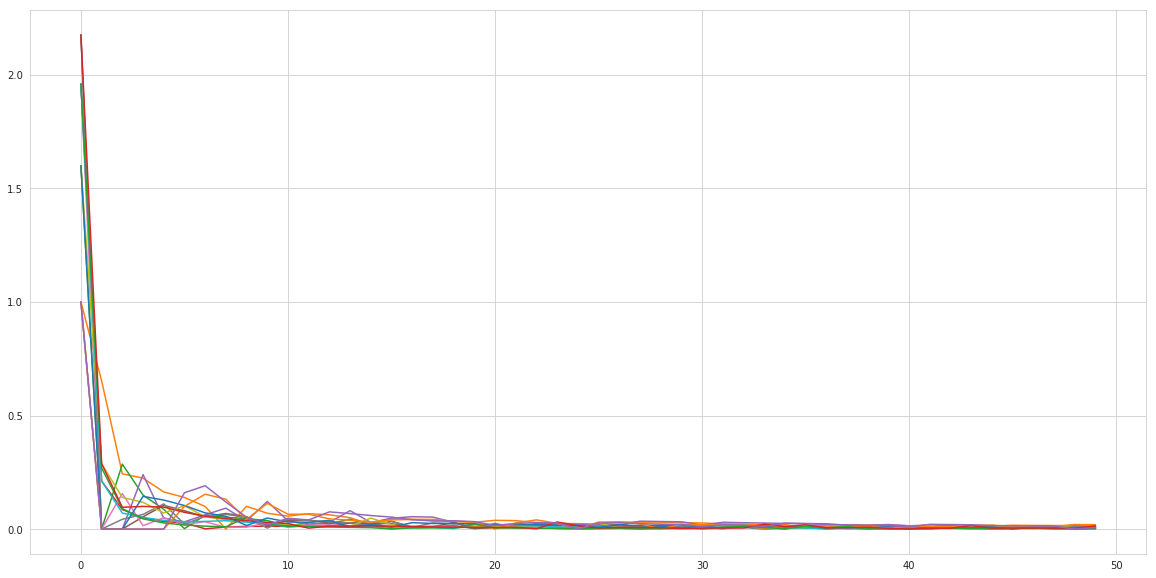

In [7]:

# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

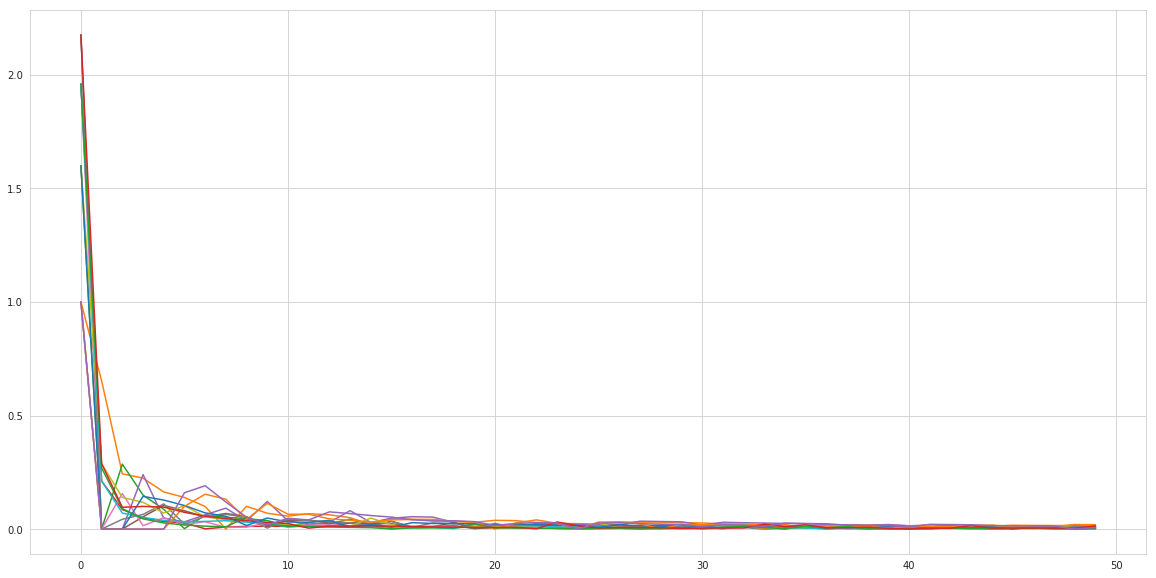

In [8]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)